# QUANDELA REMOTE CHALLANGE - TEAM FOCKCATS

In [1]:
import math
import perceval as pcvl
import numpy as np
import math

In [2]:
from perceval.components.unitary_components import PS, BS, PERM
from perceval.components.port import Port, Encoding
from perceval.utils import Encoding, PostSelect, Matrix
from perceval.components import Unitary

## The CZ gate in reference [5] - as a warm-up to the problem

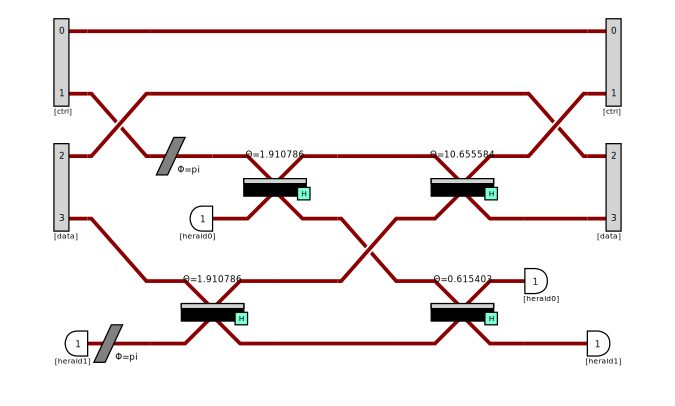

In [3]:
# Create 4 modes for the photons that has been encoded for the CZ operation, while the first two modes represent the |1> state of the first qbit, and the last two modes represent the herald qbits.
Knill_CZ = pcvl.Processor("SLOS", 4)

# Add the two pi-phase shifters to to the two system qubits
Knill_CZ.add(0, PS(phi=np.pi))
Knill_CZ.add(3, PS(phi=np.pi))

# Add the beam splitters
theta1 = 54.74 * 2 * np.pi / 180
theta2 = 17.63 * 2 * np.pi / 180

Knill_CZ.add((0, 2), BS.H(theta=theta1))
Knill_CZ.add((2, 3), BS.H(theta=theta1))
Knill_CZ.add((0, 2), BS.H(theta=-theta1))
Knill_CZ.add((2, 3), BS.H(theta=theta2))

# Add the heralds for the two beam splitters
Knill_CZ.add_herald(2,1)
Knill_CZ.add_herald(3,1)

# Since the the modes 0 and 1 are the |1> state of the control and target qubits respectively, we need to permute the modes to make the CZ gate act on the correct modes
CZ_gate = pcvl.Processor("SLOS", 4)
CZ_gate.add(1, PERM([1, 0]))
CZ_gate.add(2, Knill_CZ)
CZ_gate.add(1, PERM([1, 0]))

# Add ports
CZ_gate.add_port(0, Port(Encoding.DUAL_RAIL, 'ctrl'))
CZ_gate.add_port(2, Port(Encoding.DUAL_RAIL, 'data'))

pcvl.pdisplay(CZ_gate, recursive=True)

In [4]:
# Analyze the performance of the newly-created CZ gate
processor = pcvl.Processor("SLOS", 4)
processor.add(2, pcvl.BS.H())
processor.add(0, CZ_gate) # This is the gate that we created
processor.add(2, pcvl.BS.H())

# Everything else is the same
states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(processor, states)

truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


performance = 0.07406604842851158, fidelity = 0.9999999915267557


## The CCZ gate in the Preceval library - serves as the bottom line

In [5]:
processor = pcvl.Processor("SLOS", 6)
processor.add(4, pcvl.BS.H())
processor.add(0, pcvl.catalog["postprocessed ccz"].build_processor())
processor.add(4, pcvl.BS.H())

# Change the evaluation states to 3 qubits in dual-railed encoding
states = {
    pcvl.BasicState([1, 0, 1, 0, 1, 0]): "000",
    pcvl.BasicState([1, 0, 0, 1, 1, 0]): "010",
    pcvl.BasicState([0, 1, 1, 0, 1, 0]): "100",
    pcvl.BasicState([0, 1, 0, 1, 1, 0]): "110",
    pcvl.BasicState([1, 0, 1, 0, 0, 1]): "001",
    pcvl.BasicState([1, 0, 0, 1, 0, 1]): "011",
    pcvl.BasicState([0, 1, 1, 0, 0, 1]): "101",
    pcvl.BasicState([0, 1, 0, 1, 0, 1]): "111"
}

ca = pcvl.algorithm.Analyzer(processor, states)

# What is the truth table for the CCX (Tofolli) gate?
truth_table = {"000": "000", "010": "010", "100": "100", "110": "111", 
               "001": "001", "011": "011", "101": "101", "111": "110"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,000,010,100,110,001,011,101,111
000,1,0,0,0,0,0,0,0
010,0,1,0,0,0,0,0,0
100,0,0,1,0,0,0,0,0
110,0,0,0,0,0,0,0,1
001,0,0,0,0,1,0,0,0
011,0,0,0,0,0,1,0,0
101,0,0,0,0,0,0,1,0
111,0,0,0,1,0,0,0,0


performance = 0.017559993780020683, fidelity = 1.0


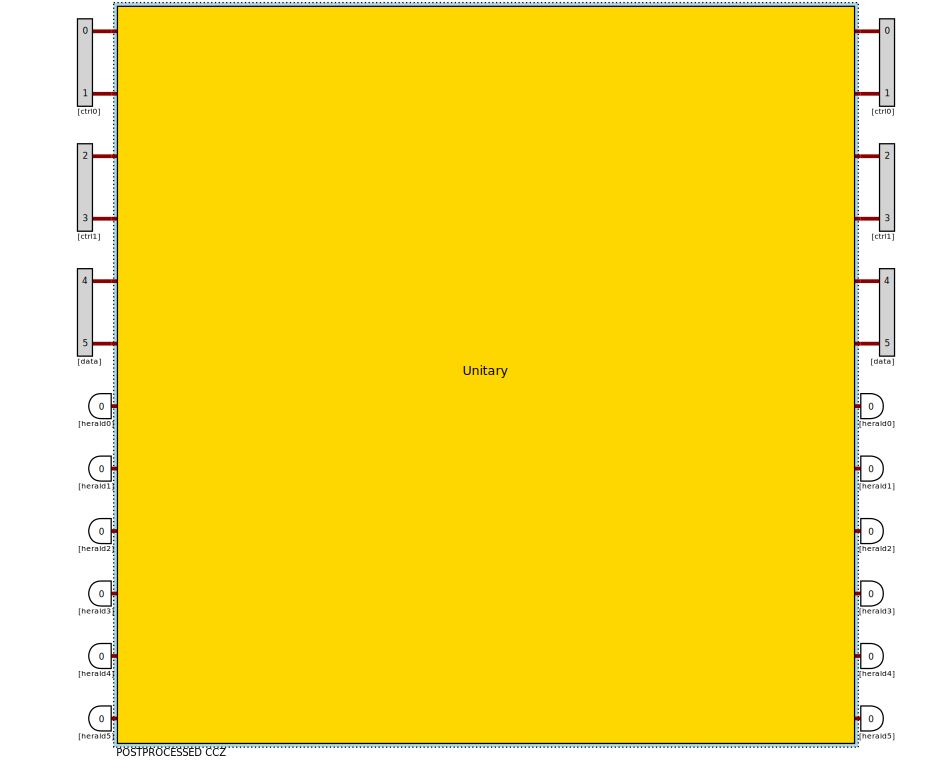

In [6]:
# What does the pre-defined CCZ gate look like?
pcvl.pdisplay(pcvl.catalog["postprocessed ccz"].build_processor(), recursive=True)  

In [7]:
# OK, I can't see anything inside. I'll copy their source code here. It is a unitary operator

m = Matrix([[0.509824528533959, 0, 0, 0, 0, 0, 0, 0, 0, 0.860278414296864, 0, 0],
                    [0, 0.509824528533959, 0, 0.321169327626332 + 0.556281593281541j, 0, 0, 0.330393705586394,
                        - 0.165196852793197 - 0.286129342288294j, -0.165196852793197 + 0.286129342288294j, 0, 0, 0],
                    [0, 0, 0.509824528533959, 0, 0, 0, 0, 0, 0, 0, 0.860278414296864, 0],
                    [0, 0, 0, 0.509824528533959, 0, 0.321169327626332 + 0.556281593281541j, -0.165196852793197
                        + 0.286129342288294j, 0.330393705586394, -0.165196852793197 - 0.286129342288294j, 0, 0, 0],
                    [0, 0, 0, 0, 0.509824528533959, 0, 0, 0, 0, 0, 0, 0.860278414296864],
                    [0, 0.321169327626332 + 0.556281593281541j, 0, 0, 0, 0.509824528533959, -0.165196852793197
                        - 0.286129342288294j, -0.165196852793197 + 0.286129342288294j, 0.330393705586394, 0, 0, 0],
                    [0, 0.330393705586394, 0, -0.165196852793197 - 0.286129342288294j, 0, -0.165196852793197
                        + 0.286129342288294j, -0.509824528533959, 0, -0.321169327626332 + 0.556281593281541j, 0, 0, 0],
                    [0, -0.165196852793197 + 0.286129342288294j, 0, 0.330393705586394, 0, -0.165196852793197
                        - 0.286129342288294j, -0.321169327626332 + 0.556281593281541j, -0.509824528533959, 0, 0, 0, 0],
                    [0, -0.165196852793197 - 0.286129342288294j, 0, -0.165196852793197 + 0.286129342288294j, 0,
                        0.330393705586394, 0, -0.321169327626332 + 0.556281593281541j, -0.509824528533959, 0, 0, 0],
                    [0.860278414296864, 0, 0, 0, 0, 0, 0, 0, 0, -0.509824528533959, 0, 0],
                    [0, 0, 0.860278414296864, 0, 0, 0, 0, 0, 0, 0, -0.509824528533959, 0],
                    [0, 0, 0, 0, 0.860278414296864, 0, 0, 0, 0, 0, 0, -0.509824528533959]])

# m is indeed a unitary matrix, up to the numerical precision
m_dagger = np.conjugate(m).T
m_dagger_m = np.dot(m_dagger, m)
m_dagger_m

# I guess the whole point for this challenge is to optimize m to give better performance, while keeping the fidelity same as 1.0

MatrixN([[ 1.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
          -1.45492529e-18+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j],
         [ 0.00000000e+00+0.00000000e+00j,
           1.00000000e+00-1.10422226e-17j,
           0.00000000e+00+0.00000000e+00j,
          -1.86607692e-17-3.57986918e-16j,
           0.00000000e+00+0.00000000e+00j,
          -3.42970653e-17+3.41273565e-16j,
          -1.81312712e-17-2.21185450e-18j,
           1.81312712e-17+2.21185450e-18j,
          -2.23383234e-18-8.20707078e-18j,
           0.00000000e+00+0.00000000e+00j,
           0.00000000e+00+0.00000000e+00j,
          

## Optimizing the CCZ gate - Getting serious now!

According to [6], `the maximum success probability is attained with minimal required resources!!`
In the above examples, there 6 herald modes used, which makes the whole matrix 12x12. According to [6], the minimum number of 3 heralds are needed to reach perfect fidelity. Let's optimize using the case where 3, 4, 5, 6 heralds, corresponding to 9x9, 10x10, 11x11, 12x12 matrices, respectively.

I will optimize the gate assuming that all heralds are |0>, because this minimizes the number of herald photons, the 3rd criteria for this challenge. **I think any case when a herald with |1> involved can be achieved by applying single-gates on the herald, which will not affect the overall success probability.** `Teammates, please think about this argument and see if it's a valid point!!`

In [8]:
# First, define the function to evaluate the matrix performance

def evaluate_matrix(m): # This function don't check M. make sure we input a squre matrix!
    dim = len(m) # figure out what is the dimension of the matrix
    q, r = np.linalg.qr(m) # QR decomposition. given a matrix m, we obtain q which we're sure is unitary. This serves the input of the function

    # The following part is essentially copied from the Quandela's source code
    processor = pcvl.Processor("SLOS", dim)
    processor.add(4, pcvl.BS.H()) # This is because mode 4 & 5 are the target qubit for the CCZ gate
    processor.add(0, Unitary(q))
    processor.add(4, pcvl.BS.H())

    # Post-selection. What does this mean? To be checked
    # It seems that this line is present on any 'post-selection' gates in the Quandela's source code, and is not present on 'herald' gates. Why? to be checked
    # The weird thing is that if I delete this line, the fidelity remains to be 1, and the performance almost doubles! Is this real? to be checked
    processor.set_postselection(PostSelect("[0,1]==1 & [2,3]==1 & [4,5]==1")) 

    processor.add_port(0, Port(Encoding.DUAL_RAIL, 'ctrl0'))
    processor.add_port(2, Port(Encoding.DUAL_RAIL, 'ctrl1'))
    processor.add_port(4, Port(Encoding.DUAL_RAIL, 'data'))

    for i in range(6, dim):
        processor.add_herald(i, 0)
    
    # Define the states and true tables for a CCNOT gate (after the Hadamard gates added on the data bit, CCZ gate has become a CCNOT gate and that's what we are going to evaluate)
    states = {
    pcvl.BasicState([1, 0, 1, 0, 1, 0]): "000",
    pcvl.BasicState([1, 0, 0, 1, 1, 0]): "010",
    pcvl.BasicState([0, 1, 1, 0, 1, 0]): "100",
    pcvl.BasicState([0, 1, 0, 1, 1, 0]): "110",
    pcvl.BasicState([1, 0, 1, 0, 0, 1]): "001",
    pcvl.BasicState([1, 0, 0, 1, 0, 1]): "011",
    pcvl.BasicState([0, 1, 1, 0, 0, 1]): "101",
    pcvl.BasicState([0, 1, 0, 1, 0, 1]): "111"
    }

    ca = pcvl.algorithm.Analyzer(processor, states)

    # What is the truth table for the CCNOT (Tofolli) gate?
    truth_table = {"000": "000", "010": "010", "100": "100", "110": "111", 
                   "001": "001", "011": "011", "101": "101", "111": "110"}
    ca.compute(expected=truth_table)
    # pcvl.pdisplay(ca)
    return ca.performance, ca.fidelity.real

In [9]:
# Let's optimize the function evaluate_matrix respect to m
# This is my first time ever to implement an advanced optimization algorithm to solve a real-world problem. I'm so excited! But please see if there is anything we an improve!
# I chose genetic algorithm. Not sure if this is the best choice

# Genetic Algorithm Components
class GeneticAlgorithm:
    def __init__(self, population_size, matrix_shape, mutation_rate, generations):
        self.population_size = population_size
        self.matrix_shape = matrix_shape
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = [np.random.rand(*matrix_shape) for _ in range(population_size)]
    
    def fitness(self, matrix):
        a, b = evaluate_matrix(Matrix(matrix))
        return 10 * a - 1e7 * (1 - b)  # Maximizing a, giving a large peanalty for b < 1
    
    def select(self):
        # Simple tournament selection
        selected = []
        for _ in range(self.population_size):
            i, j = np.random.randint(0, self.population_size, 2)
            selected.append(self.population[i] if self.fitness(self.population[i]) > self.fitness(self.population[j]) else self.population[j])
        return selected
    
    def crossover(self, parent1, parent2):
        # Single point crossover
        if np.random.rand() < 0.5:  # Swap parents to ensure diversity
            parent1, parent2 = parent2, parent1
        split = np.random.randint(1, np.prod(self.matrix_shape))
        child1_flat = np.concatenate((parent1.flatten()[:split], parent2.flatten()[split:]))
        child2_flat = np.concatenate((parent2.flatten()[:split], parent1.flatten()[split:]))
        return child1_flat.reshape(self.matrix_shape), child2_flat.reshape(self.matrix_shape)
    
    def mutate(self, matrix):
        # Random mutation
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if np.random.rand() < self.mutation_rate:
                    matrix[i, j] += np.random.normal(0, 1)
        return matrix
    
    def evolve(self):
        for generation in range(self.generations):
            new_population = []
            selected = self.select()
            for i in range(0, self.population_size, 2):
                parent1, parent2 = selected[i], selected[i+1]
                child1, child2 = self.crossover(parent1, parent2)
                new_population.append(self.mutate(child1))
                new_population.append(self.mutate(child2))
            self.population = new_population
            # Optional: Print best fitness in generation
            best_fitness = max(self.fitness(matrix) for matrix in self.population)
            good_matrix = max(self.population, key=self.fitness)
            p, f = evaluate_matrix(Matrix(good_matrix))
            print(f"Generation {generation+1}: Best Fitness = {best_fitness}, Performance = {p}, Fidelity = {f}")
        return self.best_solution()
    
    def best_solution(self):
        best_matrix = max(self.population, key=self.fitness)
        return best_matrix, self.fitness(best_matrix)

# Parameters for the GA
population_size = 100
dim = 9
matrix_shape = (dim, dim)  # Example matrix shape
mutation_rate = 0.05
generations = 500

# Initialize and run the GA
ga = GeneticAlgorithm(population_size, matrix_shape, mutation_rate, generations)
best_matrix, best_fitness = ga.evolve()

best_matrix, best_fitness

Generation 1: Best Fitness = -5625383.713208989, Performance = 0.02253562569531889, Fidelity = 0.4374616061434754
Generation 2: Best Fitness = -6348300.560057424, Performance = 0.0028710366240592075, Fidelity = 0.365169941123221
Generation 3: Best Fitness = -6426827.478040812, Performance = 0.003149953715482573, Fidelity = 0.3573172490459652
Generation 4: Best Fitness = -5577038.102341794, Performance = 0.00686650317965945, Fidelity = 0.4422961828993174
Generation 5: Best Fitness = -6030793.464021394, Performance = 0.003406469234104434, Fidelity = 0.39692065019139133
Generation 6: Best Fitness = -5854920.85362727, Performance = 0.009930664745347387, Fidelity = 0.41450790470660825
Generation 7: Best Fitness = -5800041.4034426315, Performance = 0.024286240123207743, Fidelity = 0.4199958353694967
Generation 8: Best Fitness = -4118242.5626295395, Performance = 0.07785045022128073, Fidelity = 0.5881756658865959
Generation 9: Best Fitness = -5069766.764668733, Performance = 0.019138995757125

(array([[ 25.59049385,  -5.43796247,   3.60220135,  -2.40719708,
           3.82261704,  -8.37856576,  -0.21988188,   0.34130629,
           7.40783522],
        [  0.34693688,   5.63847369,   0.19685201,   9.41510656,
          -0.77739962,  -1.47032505,   0.34632738,  -5.3162834 ,
           1.55616257],
        [  0.85626519,  -0.07800748, -23.24934382,  -0.25318446,
           0.54265673, -11.42453276,  -2.76392074,  -6.02731853,
          -4.368726  ],
        [ -0.09047742,   5.67560055,   0.93608411,  -8.49087582,
          -4.56440212,  -7.52664516,  11.74023344,   0.47133831,
           9.37925092],
        [ -0.12506459,   4.75008462,   0.51306787,  -2.0660361 ,
          17.88204994,   1.7062149 ,  -5.61387328,  -4.58454737,
          -3.89978063],
        [ -0.7570048 ,  -1.53704519,  -1.00958121,  -4.42569784,
           0.84685873,   9.15241854,   6.29298551,   0.60037314,
          -1.61808421],
        [ -1.9718201 ,   1.03703778,  -0.6173608 ,   3.6286028 ,
           